# Linear regression

## Introduction

Let $Y$ be a **dependent variable**, also called **response variable** or **predictor**, whose behaviour can be explained by the **independent variables** $X_1, X_2, \ldots, X_k$, also known as **explanatory variables** or **features**.

Unlike classification, where $Y$ can take a finite number of outcomes, in regression $Y$ is a continuous variable.

In linear regression, the relationship between the independent and dependent variables can be described as follows:
$$Y = \beta_0 + \beta_1 X_1 + \ldots \beta_k X_k + \epsilon$$
where $\beta_0, \beta_1, \ldots, \beta_k$ are the model parameters and $\epsilon$ is a random error. Typically, $\epsilon$ is assumed to follow a normal distribution with zero mean and constant variance.

## Simple linear regression

In the most simple scenario, when there is a single independent variable $X$, the model is equivalent to
$$Y = \beta_0 + \beta_1 X + \epsilon$$
In other words, $(X, Y)$ lies around a straight line with intercept $\beta_0$ and slope $\beta_1$.

To illustrate the model, lets sample a few points and plot both the sampled points and the straight line.

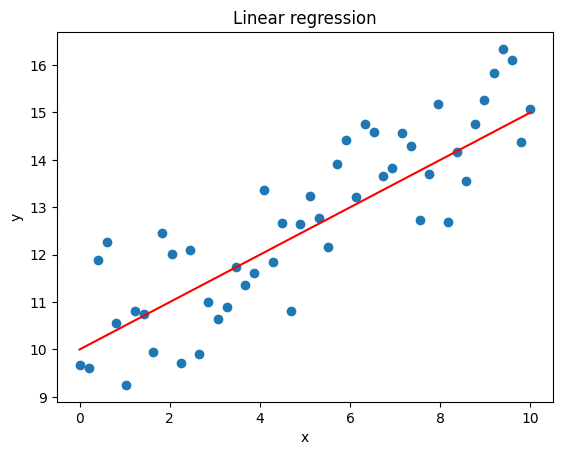

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=1000)
beta = [10, 0.5]
x = np.linspace(0, 10)
error = rng.normal(0, 1, size=x.shape)
y = beta[0] + beta[1]*x + error

plt.figure()
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-")
plt.show()

## Estimation

In real life applications, the model parameters are unknown and need to be estimated from the data. To do so, we need to ask ourselves which is the best straight line that describes our data? And what does exactly *best straight line* mean? What criteria do we use? Usually, we choose the parameters that minimizes the sum of the squared differences between the observed dependent variable and the output of the linear function of the independent variables.
$$(\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_k) = \underset{(\beta_0, \beta_1, \ldots, \beta_k)}{\text{arg min}} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \ldots - \beta_k x_{ik})^2$$

We call this estimator as **ordinary least squares** estimator.

To simplify the notation, let
* $\mathbf{y} = (y_1, \ldots, y_n)$ be the vector of observed dependent variables,
* $\mathbf{\beta} = (\beta_0, \beta_1, \ldots, \beta_k)$ be the vector of model parameters, and
* $\mathbf{X} = (x_{ij})$ be the matrix of observed independent variables, where each row $\mathbf{x}_i = (1, x_{i1}, \ldots, x_{ik})$ represents an observation and each column represents a feature. The first column of $\mathbf{X}$ is filled with ones and is the column corresponding to the intercept $\beta_0$.

The ordinary least squares estimator can be rewritten as
$$\hat{\beta} = \underset{\beta}{\text{arg min}}\sum_{i=1}^{n} (y_i - \mathbf{x}_i^{\top} \mathbf{\beta})^2$$
Simplifying even further
$$\hat{\beta} = \underset{\beta}{\text{arg min }} (\mathbf{y} - \mathbf{X\beta})^{\top} (\mathbf{y} - \mathbf{X\beta})$$

It can be shown that this estimator is the solution of the linear equation
$$\mathbf{X}^{\top} \mathbf{X} \hat{\beta} = \mathbf{X}^{\top} \mathbf{y}$$
See [Maximum likelihood estimator](#maximum-likelihood-estimator) for the proof.

In [2]:
from numpy.linalg import solve

X = np.column_stack((np.ones(x.shape), x))
with np.printoptions(precision=2, threshold=10, edgeitems=3):
    print("Matrix of observed independent variables:")
    print(X)
    print("Vector of observed dependent variables:")
    print(y)

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Matrix of observed independent variables:
[[ 1.    0.  ]
 [ 1.    0.2 ]
 [ 1.    0.41]
 ...
 [ 1.    9.59]
 [ 1.    9.8 ]
 [ 1.   10.  ]]
Vector of observed dependent variables:
[ 9.68  9.62 11.88 ... 16.1  14.38 15.08]
Ordinary least squares estimator:
[9.95883682 0.54698849]


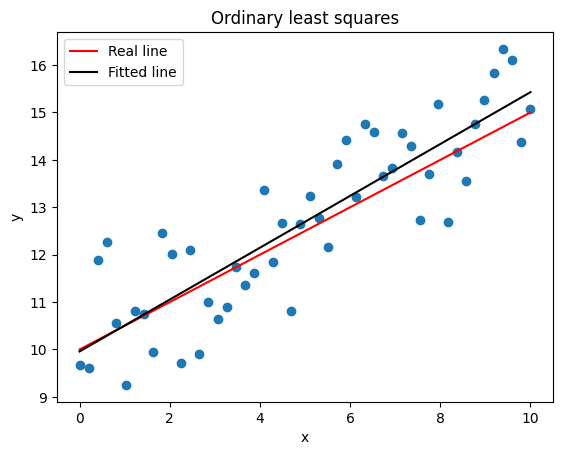

In [3]:
plt.figure()
plt.title("Ordinary least squares")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-", label="Real line")
plt.plot(x, beta_ols[0] + beta_ols[1]*x, "k-", label="Fitted line")
plt.legend()
plt.show()

### Systolic blood pressure

The following table gives measurements of systolic blood pressure for 20 men of various ages:

In [4]:
import pandas as pd

df_blood = pd.read_csv("data/blood-pressure.csv")
df_blood.head()

,age,pressure
0,30,108
1,30,110
2,30,106
3,40,125
4,40,120


We have the following variables:
- *age* The age of the men in years.
- *pressure* The measured pressure for each person in mm Hg.

We want to predict *pressure* in terms of *age*.

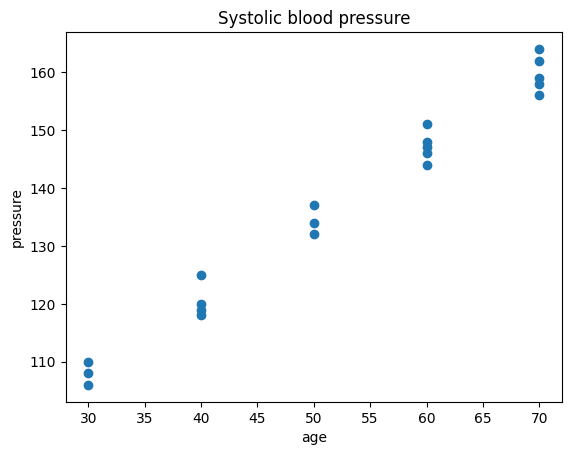

In [5]:
plt.figure()
plt.title("Systolic blood pressure")
plt.xlabel("age")
plt.ylabel("pressure")
plt.plot("age", "pressure", "o", data=df_blood)
plt.show()

From the scatter plot we notice that there is a linear relationship between the age and the pressure. The pressure increases as the age increases.

In [6]:
n, _ = df_blood.shape
X = np.column_stack((np.ones(n), df_blood.age))
y = df_blood.pressure

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Ordinary least squares estimator:
[68.78490566  1.30314465]


The ordinary least squares estimator for $\beta_0$ and $\beta_1$ are 68.78 and 1.30, respectively. This means that the pressure starts at 68.78 mm Hg and increases in a rate of 1.30 mm Hg per year.

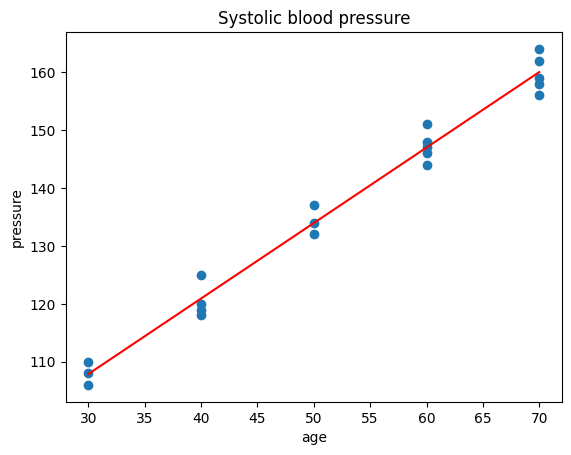

In [7]:
df_blood["fitted_pressure"] = beta_ols[0] + beta_ols[1]*df_blood["age"]

plt.figure()
plt.title("Systolic blood pressure")
plt.xlabel("age")
plt.ylabel("pressure")
plt.plot("age", "pressure", "o", data=df_blood)
plt.plot("age", "fitted_pressure", "r-", data=df_blood)
plt.show()

Once the model is fitted, we can predict values for unobserved data. For example, we can tell from the model that the average blood pressure for a 45 years old person is approximately 125 mm Hg.

## Mean Squared Error and other metrics

When we train a model, we want to measure in some way its performance. There are a couple of metrics that can be used for linear regression.

- **Mean Squared Error**: The mean squared error (mse) is defined as the average of the squared differences between the observed dependent variable and the value predicted by the model
$$MSE(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The least squares estimator minimizes the mean squared error. Therefore, we will expect a small *mse* in a good model. However, what is considered a good *mse* in a model? Because the mean squared error is not in the same scale as the data, we might want to compute its square root.

- **Root Mean Squared Error**: As the name suggests, it is defined as the squared root of the mean squared error.

- **Coefficient of determination**: The coefficient of determination ($R^2$) is defined as one minus the ratio of the sum of the squared differences between the observed dependent variable and the value predicted by the model, and the sum of the squared differences between the observed dependent variable and its average
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

The coefficient of determination compares the model against a baseline model that always predicts $\bar{y}$. In the best case, the predicted values match exactly the observed values, so $R^2 = 1$. Models that have worse predictions than the baseline model will have a negative $R^2$. Most of the time, $R^2$ lies between $0$ and $1$.

In [8]:
mse = np.mean((df_blood.pressure - df_blood.fitted_pressure)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = 1 - (np.sum((df_blood.pressure - df_blood.fitted_pressure)**2) /
          np.sum((df_blood.pressure - df_blood.pressure.mean())**2))
print("Coefficient of determination:", r2)

Mean squared error: 5.945534591194968
Root mean squared error: 2.438346692165609
Coefficient of determination: 0.9826892954312147


From our previous example, we have a mean squared error of 5.94, a root mean squared error of 2.43 and a coefficient of determination of 0.98. This means that 95% of the time, the pressure will be at most 4.77 units away from the values predicted by the model (1.96 times the root mean squared error). The coefficient of determination implies that 98% of the variations in the dependent variable can be explained by the independent variables.

## Multiple linear regression

### Fuel oil consumption

Data were collected to investigate how the amount of fuel oil required to heat a home depends upon the outdoor air temperature and wind velocity. The following table contains the result for 10 winter days:

In [9]:
df_fuel = pd.read_csv("data/fuel-consumption.csv")
df_fuel.head()

,fuel,temperature,velocity
0,14.96,-3.0,15.3
1,14.10,-1.8,16.4
2,23.76,-10.0,41.2
3,13.20,0.7,9.7
4,18.60,-5.1,19.3


We have the following variables:
- *fuel* Amount of fuel oil consumption.
- *temperature* Outdoor air temperature.
- *velocity* Wind velocity.

We want to predict *fuel* in terms of *temperature* and *velocity*.

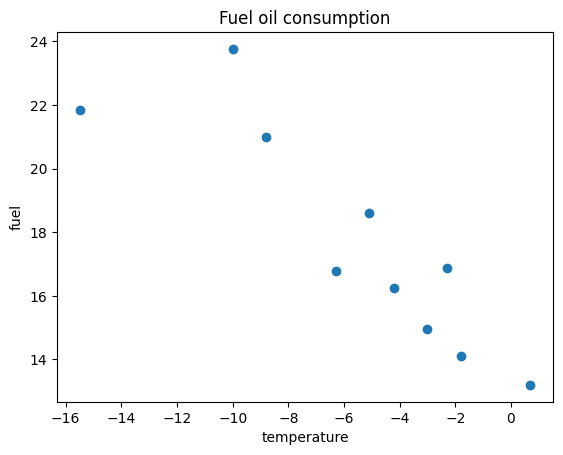

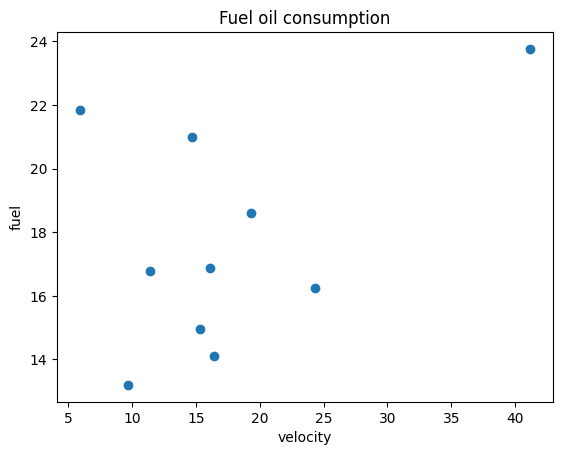

In [10]:
plt.figure()
plt.title("Fuel oil consumption")
plt.xlabel("temperature")
plt.ylabel("fuel")
plt.plot("temperature", "fuel", "o", data=df_fuel)
plt.show()

plt.figure()
plt.title("Fuel oil consumption")
plt.xlabel("velocity")
plt.ylabel("fuel")
plt.plot("velocity", "fuel", "o", data=df_fuel)
plt.show()

From the first scatter plot we notice that the fuel consumption decreases as the air temperature increases. The relationship between the fuel consumption and the wind velocity is not clear from the second scatter plot. However, we expect the fuel consumption to increase as the wind velocity increases.

In [11]:
n, _ = df_fuel.shape
X = np.column_stack((np.ones(n), df_fuel.temperature, df_fuel.velocity))
y = df_fuel.fuel

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Ordinary least squares estimator:
[11.93387029 -0.6285302   0.1298052 ]


The ordinary least squares estimator for $\beta_0$, $\beta_1$ and $\beta_2$ are 11.93, -0.62 and 0.12, respectively. This means that the fuel consumption starts at 11.93 units, decreases 0.62 units for each unit the temperature increases, and increases 0.12 units for each unit the wind velocity increases.

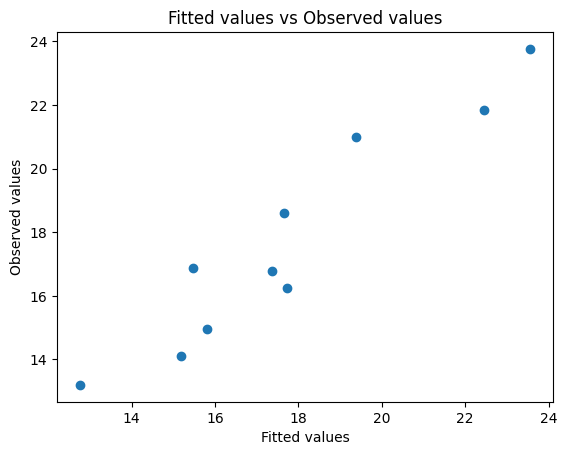

In [12]:
df_fuel["fitted_fuel"] = beta_ols[0] + beta_ols[1]*df_fuel["temperature"] \
    + beta_ols[2]*df_fuel["velocity"]

plt.figure()
plt.title("Fitted values vs Observed values")
plt.xlabel("Fitted values")
plt.ylabel("Observed values")
plt.plot("fitted_fuel", "fuel", "o", data=df_fuel)
plt.show()

We cannot plot the fitted model as in the systolic blood pressure example. Plotting the fitted values vs the observed values is a good alternative when there is more than one independent variable. We expect the fitted values to be close to the observed values.

In [13]:
mse = np.mean((df_fuel.fuel - df_fuel.fitted_fuel)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = 1 - (np.sum((df_fuel.fuel - df_fuel.fitted_fuel)**2) /
          np.sum((df_fuel.fuel - df_fuel.fuel.mean())**2))
print("Coefficient of determination:", r2)

Mean squared error: 1.0532821547278908
Root mean squared error: 1.0262953545290414
Coefficient of determination: 0.9039477868788529


We have a mean squared error of 1.05, a root mean squared error of 1.02 and a coefficient of determination of 0.90. This means that 95% of the time, the fuel consumption will be at most 2.01 units away from the values predicted by the model (1.96 times the root mean squared error). The coefficient of determination implies that 90% of the variations in the dependent variable can be explained by the independent variables.

## Polynomial regression

Polynomial regression is a form of linear regression in which we aggregate new features from the powers of another feature, resulting in a polynomial of given degree.
$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \ldots + \beta_k X^k$$
It allows to describe a nonlinear relationship between the independent and dependent variables.

### Growth of the Son of the Count de Montbeillard

The following table contains a set of measurements taken on the height of the son of the Count de Montbeillard between 1759 and 1769:

In [14]:
df_growth = pd.read_csv("data/son-growth.csv")
df_growth.head()

,age,height
0,0.0,51.4
1,0.5,65.0
2,1.0,73.1
3,1.5,81.2
4,2.0,90.0


We have the following variables:
- *age* The age of the son in years.
- *height* The height of the son in cm.

We want to predict *height* in terms of *age*.

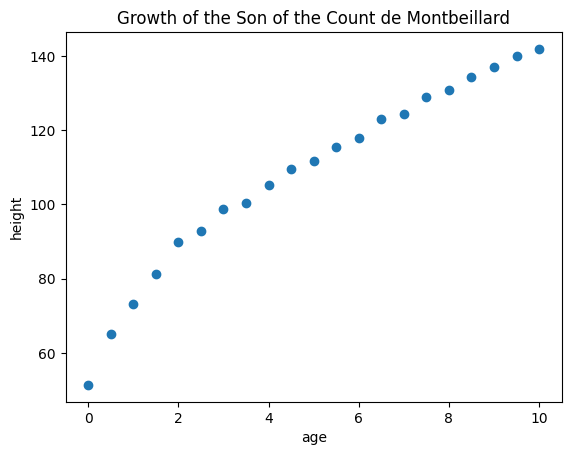

In [15]:
plt.figure()
plt.title("Growth of the Son of the Count de Montbeillard")
plt.xlabel("age")
plt.ylabel("height")
plt.plot("age", "height", "o", data=df_growth)
plt.show()

Unlike in previous examples, the age and the height doesn't seem to follow a linear relationship. The height increases as the age increases. However, the height increases slower as the age increases rather than increasing at a constant rate.

In [16]:
n, _ = df_growth.shape
X = np.column_stack((np.ones(n), df_growth.age))
y = df_growth.height

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Ordinary least squares estimator:
[68.09177489  8.02545455]


For a polynomial of degree one (a straight line), the ordinary least squares estimator of $\beta_0$ and $\beta_1$ are 68.09 and 8.02, respectively.

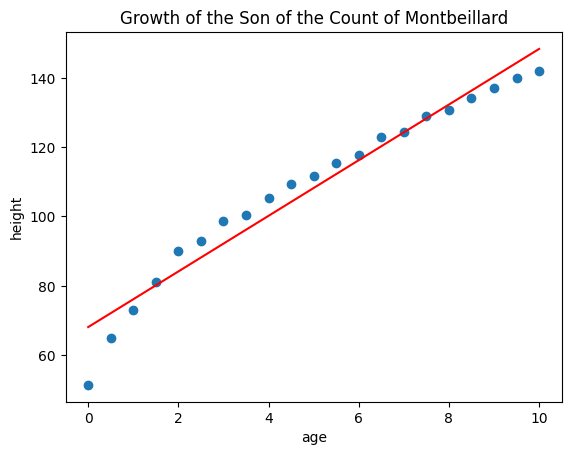

In [17]:
df_growth["fitted_height"] = beta_ols[0] + beta_ols[1]*df_growth["age"]

plt.figure()
plt.title("Growth of the Son of the Count of Montbeillard")
plt.xlabel("age")
plt.ylabel("height")
plt.plot("age", "height", "o", data=df_growth)
plt.plot("age", "fitted_height", "r-", data=df_growth)
plt.show()

Just as expected, a straight line model doesn't seem to describe well the relationship between the age and the height. The height is quite far from the line during the first two years. Similarly, the height starts to distance from the line during the last two years.

In [18]:
mse = np.mean((df_growth.height - df_growth.fitted_height)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = 1 - (np.sum((df_growth.height - df_growth.fitted_height)**2) /
          np.sum((df_growth.height - df_growth.height.mean())**2))
print("Coefficient of determination:", r2)

Mean squared error: 29.497507318078743
Root mean squared error: 5.431160770781762
Coefficient of determination: 0.9524159649788461


The mean squared error, root mean squared error and coefficient of determination for this model are 29.49, 5.43 and 0.95, respectively.

In [19]:
n, _ = df_growth.shape
X = np.column_stack((np.ones(n), df_growth.age, df_growth.age**2))
y = df_growth.height

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Ordinary least squares estimator:
[59.07972897 13.71727302 -0.56918185]


On the other hand, for a polynomial of degree two (a parabole), the ordinary least squares estimator of $\beta_0$, $\beta_1$ and $\beta_2$ are 59.07, 13.71 and -0.56, respectively.

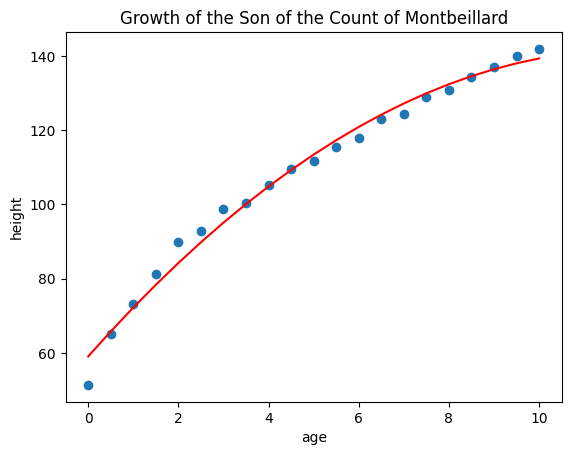

In [20]:
df_growth["fitted_height"] = beta_ols[0] + beta_ols[1]*df_growth["age"] \
    + beta_ols[2]*df_growth["age"]**2

plt.figure()
plt.title("Growth of the Son of the Count of Montbeillard")
plt.xlabel("age")
plt.ylabel("height")
plt.plot("age", "height", "o", data=df_growth)
plt.plot("age", "fitted_height", "r-", data=df_growth)
plt.show()

We can appreciate an improvement on the fitted values in this model. The parabole seems to describe much better the relationship between the age and the height.

In [21]:
mse = np.mean((df_growth.height - df_growth.fitted_height)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = 1 - (np.sum((df_growth.height - df_growth.fitted_height)**2) /
          np.sum((df_growth.height - df_growth.height.mean())**2))
print("Coefficient of determination:", r2)

Mean squared error: 7.868145366238856
Root mean squared error: 2.805021455575493
Coefficient of determination: 0.9873074663353274


The mean squared error, root mean squared error and coefficient of determination for this model are 7.86, 2.80 and 0.98, respectively. If we compare the metrics of this model with the metrics of the straight line model, we notice that the mean squared error and root mean squared error decreased, while the coefficient of determination increased. The change in the metrics indicates that there was an improvement by fitting a polynomial of degree two.

We could attempt to fit a polynomial of degree three or higher, hoping for better results. However, there are a couple of issues when fitting polynomials of higher degrees:
- High degree polynomials are bound to overfitting. They tend to fit too well the data but they fail to predict unobserved data.
- High degree polynomials are sensitive to small variations in the data. A small change in the independent variable might result in a big change in the predicted values.

## Maximum likelihood estimator

Let $(\mathbf{x}_i, y_i)$, $i = 1, 2, \ldots, n$ be observations of the independent and dependent variables. Recall that the errors $\epsilon_i = y_i - \mathbf{x}_i^{\top} \mathbf{\beta}$ follow a normal distribution with zero mean and constant variance $\sigma^2$. The likelihood function of the errors, which is defined as the joint density function as a function of the parameters, is
\begin{align*}
L(\mathbf{\beta}, \sigma^2 | \mathbf{\epsilon}) &= \prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{\epsilon_i^2}{2\sigma^2}\right) \\
&= \prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2}{2\sigma^2}\right) \\
&= \frac{1}{\sigma^n (2\pi)^{n/2}}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2\right)
\end{align*}

The log likelihood function is therefore
\begin{align*}
l(\mathbf{\beta}, \sigma^2 | \mathbf{\epsilon}) &= \log L(\mathbf{\beta}, \sigma^2 | \mathbf{\epsilon}) \\
&= -n\log\sigma - \frac{n}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2
\end{align*}

To maximize the log likelihood is equivalent to minimize
\begin{align*}
S(\mathbf{\beta}) &= \sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2 \\
&= (\mathbf{y} - \mathbf{X\beta})^{\top} (\mathbf{y} - \mathbf{X\beta}) \\
&= \mathbf{y}^{\top} \mathbf{y} - 2\mathbf{\beta}^{\top}\mathbf{X}^{\top}\mathbf{y} + \mathbf{\beta}^{\top}\mathbf{X}^{\top}\mathbf{X\beta}
\end{align*}

As a consequence, the maximum likelihood estimator of $\mathbf{\beta}$ is also the ordinary least squares estimator of $\mathbf{\beta}$. The gradient of $S$ is
\begin{align*}
\nabla S(\beta) &= - 2\mathbf{X}^{\top}\mathbf{y} + 2\mathbf{X}^{\top}\mathbf{X\beta}
\end{align*}

The maximum likelihood estimator of $\mathbf{\beta}$ is hence solution of the equation
\begin{align*}
\nabla S(\beta) &= 0 \\
-2\mathbf{X}^{\top}\mathbf{y} + 2\mathbf{X}^{\top}\mathbf{X\beta} &= 0 \\
\mathbf{X}^{\top}\mathbf{X\beta} &= \mathbf{X}^{\top}\mathbf{y}
\end{align*}

On the other hand, the derivative of the likelihood with respect to $\sigma$ is
\begin{align*}
\frac{\partial}{\partial\sigma}l(\mathbf{\beta}, \sigma^2 | \mathbf{\epsilon}) &= -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2
\end{align*}

The maximum likelihood estimator of $\sigma^2$ is hence
\begin{align*}
\frac{\partial}{\partial\sigma}l(\mathbf{\beta}, \sigma^2 | \mathbf{\epsilon}) &= 0 \\
-\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2 &= 0 \\
\sigma^2 &= \frac{1}{n}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^{\top}\mathbf{\beta})^2
\end{align*}
which we previously defined as the mean squared error.

## References

- J. G. Kalbfleisch, *Probability and Statistical Inference Volume 2: Statistical Inference*, Chapter 14, Second Edition.
- Alvin C. Rencher and G. Bruce Schaalje, *Linear Models in Statistics*, Chapter 7, Second Edition